# Reject Inference 

Find Reasoncodes that are inRejected applied applicaitons and not in approved to find the ones that are only hard rejection codes


# KOLLA IGENOM SEN HUR JAG FILTERRAR N3 för jag får inte samma värden nu som jag fick första gången jag kollade!!!


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import os

import pandas as pd
import numpy as np


def getreasonCodes(df): 

    all_codes = []

    code_dict = {}

    for ne in range(1,6,1):

        var = 'reasoncode' + str(ne)
        unique = list(set(df[var]))

        code_dict[var] = unique

        all_codes.append(unique)


    all_all = []

    for l in all_codes:
        for ind in l:
            all_all.append(ind)

    unique = set(all_all)


    return  unique , code_dict


I need python version 3.9.17 in order to run 
import pymssql

In [2]:
from Preprocessing_Application import DataPreprocessor

server = 'reporting-db.nystartfinans.net'
database = 'reporting-db'
username = 'Andreas'
password = 'nCq8Sg@1lYnd(E'


path_MA = "/Users/andreasnilsson/Desktop/PD 2/DATA/Application MA Today.sql"
path_CO = "/Users/andreasnilsson/Desktop/PD 2/DATA/Application CO Today.sql"

preprocessor = DataPreprocessor(server, database, username, password)

main = preprocessor.fetch_data_from_sql(path_MA)
co = preprocessor.fetch_data_from_sql(path_CO)


/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Data-PD-Modelling/Codes/Cut -Off/Preprocessing_Application.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


In [416]:

main['Applicationtype'] = 0

co['Applicationtype'] = np.where((co['HasCoapp'] == 1) & (co['CoappSameAddress'] == 1), 2,
                                 np.where((co['HasCoapp'] == 1) & ((co['CoappSameAddress'] == 0) | (co['CoappSameAddress'] == -1)), 1,
                                          1))  ## Will assume missing is same address since its missing in the data and thats the worst case

df = pd.concat([main, co])  


In [417]:
#df = df[(df.create_date >= '2023-10-01') & (df.create_date < '2023-11-01')& (df.UCScore >-1)]


In [418]:
df[df.U_applicationid == '8822878']

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
1342,8822878,2023-10-23 16:40:19.823,{5DM},AP,ACC,"{""Medsökande har fler än 5 frågor inom 5 dagar.""}",5DM,Medsökande har fler än 5 frågor inom 5 dagar.,None,None,None,None,None,None,None,None,7,8,21,17988,460000,84,23.1,E,1995,3.88,PDscore_Newcustomer01,NaN,7959950,8822878,NaN,0,1,3.878741,2023-09-14,None,460000.0,0,Edvin,WEB,Nystartlånet,0,None,WEB,1963-01-29,,SINGLE,FULL,RENTED,36000.0,None,Missing,Missing,Missing,Undefined,2023-09-19,2,Female,-1,0.0,6.0,1.0,1.0,None,240345.0,NaN,434676.0,6E667A221B6605B48CB6F0C77581D51E1A6085AF34A9FB...,8,0.098,2022,None,None,423,None,19,None,None,403,2021,None,None,414,None,17,None,None,398,403400.0,397800.0,NaN,19300.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,958,None,1.0,1.0,1.0,1.0283,0.8025,6,1,0,1,0,None,1.66,1.92,0.33,1.36,0.0,0.76,434676,9,8,441939,1809,167737,265130,None,None,9,8,175000,6,2.0,338061,345324,2,193230,1,0,6,0,95.85,Nej,None,None,0,1,65086c6c7556896233518f1a,2023-09-18,65086c6c7556896233518f1a2023-09-18,6301293988,12,82,26131,N,None,None,1,None,2022-11-01,None,None,1.0


In [419]:
df.Product.value_counts()

Product
Lån mot Lån              69144
Nystartlånet             13088
Förmedlare Skuldsaldo     1204
Name: count, dtype: int64

In [420]:
df.Applicationtype.value_counts()

Applicationtype
0    67415
1    13051
2     2970
Name: count, dtype: int64

In [421]:
df.SalesChannel.value_counts()

SalesChannel
BROKER    70629
WEB       12807
Name: count, dtype: int64

In [422]:
#df = df[df.Product =='Lån mot Lån']

#df = df[df.Product =='Nystartlånet']    

In [423]:
df.Product.value_counts()

Product
Lån mot Lån              69144
Nystartlånet             13088
Förmedlare Skuldsaldo     1204
Name: count, dtype: int64

In [424]:
df_Broker = df[df.SalesChannel == 'BROKER']
df_Web = df[df.SalesChannel != 'BROKER']

In [425]:
df_Broker.sysdecgrpstd.value_counts()

df_Broker

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
0,8770335,2023-08-01 00:22:34.027,{INK},RF,REJ,"{""Sökandes uppgivna inkomst mer än 120 % av UC...",INK,Sökandes uppgivna inkomst mer än 120 % av UC i...,None,None,None,None,None,None,None,None,7,8,49,-3611,200000,120,17,B,495,4.27,PDscore_Newcustomer01,1.0,8770335,8770335,2179B242845F2D3CC0B33B7C94F416BC486FF69FF26A8E...,1,0,4.272936,2023-08-01,None,200000.0,0,None,BROKER,Lån mot Lån,0,Lendo,BROKER,1997-10-26,,SINGLE,FULL,RENTED,29000.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,0.0,3.0,1.0,2.0,None,169887.0,NaN,169887.0,2179B242845F2D3CC0B33B7C94F416BC486FF69FF26A8E...,6,0.112,2022,None,None,269,None,17,None,None,252,2021,None,None,162,None,8,None,None,153,252000.0,153400.0,NaN,16600.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,807,None,1.0,1.0,1.0,0.6324,0.7237,3,0,0,0,0,None,-0.14,-0.15,2.16,-0.26,0.00,0.93,169887,6,6,179748,9673,41231,118983,None,None,6,6,51092,3,2.0,169887,179748,2,0,1,0,3,0,80.70,Nej,None,None,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8770342,2023-08-01 00:42:45.977,{},AP,ACC,{},None,None,None,None,None,None,None,None,None,None,7,8,55,7342,200000

In [426]:
df_Web.sysdecgrpstd.value_counts()

sysdecgrpstd
AP    10882
RF     1925
Name: count, dtype: int64

In [427]:
df.Product.value_counts()

Product
Lån mot Lån              69144
Nystartlånet             13088
Förmedlare Skuldsaldo     1204
Name: count, dtype: int64

In [428]:
AP = df_Broker[df_Broker.sysdecgrpstd == 'AP']
RF =df_Broker[df_Broker.sysdecgrpstd == 'RF']

AP_code_listan, AP_dicten = getreasonCodes(AP)
RF_code_listan, RF_dicten = getreasonCodes(RF)


In [429]:
RF_code_listan & AP_code_listan 

{'1AA',
 '1UA',
 '27A',
 '27S',
 '2AS',
 '2KA',
 '2US',
 '5DM',
 '5DS',
 'ADR',
 'BEX',
 'BLS',
 'E1S',
 'E2S',
 'I25',
 'IDH',
 'INK',
 'INM',
 'MSO',
 'None',
 'O30',
 'ONI',
 'ONM',
 'RK3',
 'S30',
 'SSB',
 'TRM'}

In [430]:
#Only RF
RF_hard_codes = RF_code_listan - AP_code_listan 

# Only AP
AP_code_listan - RF_code_listan 

# Intersection
RF_code_listan & AP_code_listan 

{'1AA',
 '1UA',
 '27A',
 '27S',
 '2AS',
 '2KA',
 '2US',
 '5DM',
 '5DS',
 'ADR',
 'BEX',
 'BLS',
 'E1S',
 'E2S',
 'I25',
 'IDH',
 'INK',
 'INM',
 'MSO',
 'None',
 'O30',
 'ONI',
 'ONM',
 'RK3',
 'S30',
 'SSB',
 'TRM'}

## Analyse RF Hard Codes, what do they mean?


### sånna jag vill ifrågasätta

DEL  regel som inte implementerades pga risk men för konverteringsgrad. analysera denna!!!


EEK , ensamsökande, gammalt kalpvärde,  vi kanske inte vill bjuda på den för vi tar betalt för allt vi budar på

EES , ensamsökande, debt ratio > 170 ,  vi kanske inte vill bjuda på den för vi tar betalt för allt vi budar på


nästan som att vi borde implementera den på wewbb också 5FS

In [431]:
RF_hard_codes


{'27M',
 '5AM',
 '5AS',
 '5FM',
 '5FS',
 '60M',
 'AGT',
 'B2O',
 'B2S',
 'DEL',
 'DEM',
 'EEK',
 'EES',
 'GSL',
 'IDM',
 'INS',
 'NYM',
 'NYS',
 'RC3',
 'SSU',
 'TAX',
 'TRS',
 'UCM',
 'UCS'}

## RC3 Eller inte av de andra Hårda

In [432]:

# # Your initial filtering using a regex
filtered_RC3 = RF[RF['reasoncodes'].str.contains('|'.join(['RK3', 'RC3','27A','27S','I25']), na=False)]  # ,'DEL'
filtered_RC3



,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
3,8770332,2023-08-01 00:04:18.263,"{SSU,RC3,RK3}",RF,REJ,"{""Ensamsökande har skuldsaldo hos KFM."",""Riskk...",SSU,Ensamsökande har skuldsaldo hos KFM.,RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,7,8,0,-6809,150000,180,22.65,E,995,5.7,PDscore_Newcustomer01,1.0,8770332,8770332,A2CFC2AC54CD39F0BF3A5F5A94FBACB71B9D860F06202C...,1,0,5.695782,2023-08-01,None,150000.0,1,None,BROKER,Lån mot Lån,0,Advisa,BROKER,1987-06-06,,MARRIED,FULL,HOUSE,26600.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,1.0,NaN,NaN,NaN,2023-03-09,0.0,NaN,0.0,A2CFC2AC54CD39F0BF3A5F5A94FBACB71B9D860F06202C...,4,0.691,2022,None,None,382,None,0,None,None,381,2021,None,None,318,None,0,None,None,318,381200.0,318100.0,NaN,300.0,0.0,12,45411,2023-03-09,11808,13244,25052,1,6,None,None,None,None,0,None,None,0.0,0.0,0.0,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,0,0,None,0,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,8770413,2023-08-01 06:19:30.473,"{INK,SSU,RC3,R

In [433]:

filtered_RC3_exclude_hard = filtered_RC3.copy()

for code in RF_hard_codes:
    if code in ['RK3', 'RC3','27A','27S','I25']:  # ,'DEL'
        continue
    filtered_RC3_exclude_hard = filtered_RC3_exclude_hard[~filtered_RC3_exclude_hard['reasoncodes'].str.contains(code, na=False)]


In [434]:
BROKER_N3_REJECTS = filtered_RC3_exclude_hard 



In [435]:
pd.set_option('display.max_columns', None) 
BROKER_N3_REJECTS.head(30)

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
82,8770524,2023-08-01 09:11:24.507,"{RC3,RK3}",RF,REJ,"{""Riskklass N3, medsökande krävs"",""Riskklass N...",RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,7,8,87,-854,200000,144,22.65,E,995,9.87,PDscore_Newcustomer01,1.0,8770524,8770524,672130442CF70807691F315AA1FF1A87D9B9F350A16B73...,1,0,9.874032,2023-08-01,None,200000.0,1,None,BROKER,Lån mot Lån,0,Advisa,BROKER,1998-12-13,,SINGLE,FULL,OWNED,31000.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,1.0,NaN,4.0,2023-06-09,910780.0,NaN,325452.0,672130442CF70807691F315AA1FF1A87D9B9F350A16B73...,12,0.551,2022,None,None,358,None,35,None,None,323,2021,None,None,362,None,20,None,None,342,323000.0,342400.0,NaN,35100.0,0.0,3,764,2023-06-09,None,None,None,None,None,None,None,None,None,0,881,None,1.0,1.0,0.0,0.9088,0.9906,1,3,0,0,0,None,0.08,0.65,-1.00,-0.20,-0.02,0.97,910780,7,6,919672,None,66108,259344,None,585328,5,5,75000,1,4.0,325452,334344,4,0,None,None,1,0,88.14,Nej,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,8770546,2023-08-01 09:30:19.327,"{RC3,RK3}",RF,REJ,"{""Riskklass N3, medsökande k

In [436]:
print(len(filtered_RC3_exclude_hard))
len(filtered_RC3_exclude_hard)/len(filtered_RC3)

2953


0.583366258395891

In [437]:
filtered_RC3_exclude_hard

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
82,8770524,2023-08-01 09:11:24.507,"{RC3,RK3}",RF,REJ,"{""Riskklass N3, medsökande krävs"",""Riskklass N...",RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,7,8,87,-854,200000,144,22.65,E,995,9.87,PDscore_Newcustomer01,1.0,8770524,8770524,672130442CF70807691F315AA1FF1A87D9B9F350A16B73...,1,0,9.874032,2023-08-01,None,200000.0,1,None,BROKER,Lån mot Lån,0,Advisa,BROKER,1998-12-13,,SINGLE,FULL,OWNED,31000.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,1.0,NaN,4.0,2023-06-09,910780.0,NaN,325452.0,672130442CF70807691F315AA1FF1A87D9B9F350A16B73...,12,0.551,2022,None,None,358,None,35,None,None,323,2021,None,None,362,None,20,None,None,342,323000.0,342400.0,NaN,35100.0,0.0,3,764,2023-06-09,None,None,None,None,None,None,None,None,None,0,881,None,1.0,1.0,0.0,0.9088,0.9906,1,3,0,0,0,None,0.08,0.65,-1.00,-0.20,-0.02,0.97,910780,7,6,919672,None,66108,259344,None,585328,5,5,75000,1,4.0,325452,334344,4,0,None,None,1,0,88.14,Nej,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,8770546,2023-08-01 09:30:19.327,"{RC3,RK3}",RF,REJ,"{""Riskklass N3, medsökande k

## Broker analysis done

## Start Web analysis

In S1 there is no Hard code for excluding N3, they will just say pending in the system 

Therefor I can exclude all other hardcodes and only look at those that are N3 of system approved


In [438]:
AP = df_Web[df_Web.sysdecgrpstd == 'AP']
RF =df_Web[df_Web.sysdecgrpstd == 'RF']

AP_code_listan, AP_dicten = getreasonCodes(AP)
RF_code_listan, RF_dicten = getreasonCodes(RF)


In [439]:
#Only RF
RF_hard_codes = RF_code_listan - AP_code_listan 

# Only AP
AP_code_listan - RF_code_listan 

# Intersection
RF_code_listan & AP_code_listan 

{'5DM', '5DS', 'ADR', 'BLS', 'IDH', 'INK', 'INM', 'MSO', 'None', 'RK3'}

In [440]:
AP_code_listan



{'1AA',
 '1KA',
 '1UA',
 '27A',
 '27S',
 '2AS',
 '2KA',
 '2US',
 '5DM',
 '5DS',
 'ADR',
 'BEX',
 'BLS',
 'BWM',
 'BWS',
 'E1S',
 'E2S',
 'I25',
 'IDH',
 'IDM',
 'INK',
 'INM',
 'MSO',
 'None',
 'O30',
 'ONI',
 'ONM',
 'RK3',
 'S30',
 'SSB',
 'TRM',
 'TRS'}

In [441]:
RF_hard_codes

{'27M', 'AGT', 'EEK', 'EES', 'INS', 'NYM', 'NYS', 'RET', 'TAX', 'UCM', 'UCS'}

In [442]:

# # Your initial filtering using a regex
filtered_RC3 = AP[AP['reasoncodes'].str.contains('|'.join(['RK3', 'RC3','27A','27S','I25']), na=False)]  # ,'DEL'
filtered_RC3


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
4,8770334,2023-08-01 00:18:17.837,{RK3},AP,ACC,"{""Riskklass N3, medsökande krävs""}",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,None,None,7,8,0,5946,30000,96,22.65,E,1995,7.18,PDscore_Newcustomer01,1.0,8770334,8770334,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,1,0,7.179085,2023-08-01,None,30000.0,1,Maksim,WEB,Nystartlånet,0,None,WEB,1999-04-15,,PARTNER,FULL,RENTED,29000.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,0.0,NaN,1.0,NaN,2022-07-11,1518.0,NaN,1518.0,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,21,0.592,2022,None,None,363,None,2,None,None,361,2021,None,None,381,None,4,None,None,377,360700.0,376500.0,NaN,1900.0,0.0,6,19489,2022-07-11,None,None,None,None,None,None,None,None,None,0,0,None,0.0,0.0,1.0,0.0041,0.0013,0,0,1,0,0,None,1.00,0.00,1.0,0.00,0.0,NaN,1518,1,1,1518,1518,None,None,None,None,1,1,None,None,0.0,1518,1518,None,None,1,0,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8770341,2023-08-01 00:37:06.537,"{BEX,BWS,1KA,MSO,RK3}",AP,ACC,"{""Befintlig kund och kanal BROKER."",""Sökande ä...",BEX,Befintlig kund och kanal

In [443]:

filtered_RC3_exclude_hard = filtered_RC3.copy()

for code in RF_hard_codes:
    if code in ['RK3', 'RC3','27A','27S','I25']:  # ,'DEL'
        continue
    filtered_RC3_exclude_hard = filtered_RC3_exclude_hard[~filtered_RC3_exclude_hard['reasoncodes'].str.contains(code, na=False)]


## kommer vara samma för alla hårda policyregler är i RF

In [444]:
WEB_N3_REJECTS =  filtered_RC3_exclude_hard.copy()

In [445]:
WEB_N3_REJECTS

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
4,8770334,2023-08-01 00:18:17.837,{RK3},AP,ACC,"{""Riskklass N3, medsökande krävs""}",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,None,None,7,8,0,5946,30000,96,22.65,E,1995,7.18,PDscore_Newcustomer01,1.0,8770334,8770334,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,1,0,7.179085,2023-08-01,None,30000.0,1,Maksim,WEB,Nystartlånet,0,None,WEB,1999-04-15,,PARTNER,FULL,RENTED,29000.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,0.0,NaN,1.0,NaN,2022-07-11,1518.0,NaN,1518.0,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,21,0.592,2022,None,None,363,None,2,None,None,361,2021,None,None,381,None,4,None,None,377,360700.0,376500.0,NaN,1900.0,0.0,6,19489,2022-07-11,None,None,None,None,None,None,None,None,None,0,0,None,0.0,0.0,1.0,0.0041,0.0013,0,0,1,0,0,None,1.00,0.00,1.0,0.00,0.0,NaN,1518,1,1,1518,1518,None,None,None,None,1,1,None,None,0.0,1518,1518,None,None,1,0,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8770341,2023-08-01 00:37:06.537,"{BEX,BWS,1KA,MSO,RK3}",AP,ACC,"{""Befintlig kund och kanal BROKER."",""Sökande ä...",BEX,Befintlig kund och kanal

## RANDOMLY PICK 30 % OF ACCOUNTS, OUR WIN RATE ON BROKER IS 25 % BUT SINCE THESE ARE SOMWHAT HIGHER IN RISK WE MAKE A ASSUMPTION THAT THEY WILL BE MORE PROBABLE TO PICK UO A LOAN (+ 5 %)

In [446]:
# Setting a random seed for reproducibility

import random
random.seed(42)

sampled_BROKER_N3_REJECTS = BROKER_N3_REJECTS.sample(frac=0.3)

sampled_BROKER_N3_REJECTS


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
23994,8826890,2023-09-19 15:03:22.523,"{INK,RC3,RK3}",RF,REJ,"{""Sökandes uppgivna inkomst mer än 120 % av UC...",INK,Sökandes uppgivna inkomst mer än 120 % av UC i...,RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,7,8,25,9379,30000,120,24.65,E,995,5.41,PDscore_Newcustomer01,1.0,8826890,8826890,3CD67A4F64E11AE8E2117C3EC220A0AEC6829963AB5230...,1,0,5.406944,2023-09-19,None,30000.0,0,None,BROKER,Lån mot Lån,0,Axo,BROKER,2001-03-18,,SINGLE,FULL,OWNED,41200.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,2.0,NaN,6.0,None,1091741.0,NaN,123769.0,3CD67A4F64E11AE8E2117C3EC220A0AEC6829963AB5230...,11,0.272,2022,None,None,380,None,20,None,None,360,2021,None,None,316,None,2,None,None,314,360000.0,313600.0,NaN,20400.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,976,None,1.0,1.0,0.0,0.3253,0.1720,2,4,0,2,0,None,1.50,1.04,-1.00,1.00,-0.01,0.85,1091741,9,5,1092395,None,27346,96423,None,967972,8,5,28000,2,6.0,123769,124423,6,0,None,None,2,0,97.66,Nej,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21242,8824485,2023-09-17 16:02:36.887,"{RC3,RK3}

In [447]:
df = pd.concat([WEB_N3_REJECTS,sampled_BROKER_N3_REJECTS])

print(len(df))


df[df.sysdecgrpstd != 'RF']

4061


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
4,8770334,2023-08-01 00:18:17.837,{RK3},AP,ACC,"{""Riskklass N3, medsökande krävs""}",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,None,None,7,8,0,5946,30000,96,22.65,E,1995,7.18,PDscore_Newcustomer01,1.0,8770334,8770334,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,1,0,7.179085,2023-08-01,None,30000.0,1,Maksim,WEB,Nystartlånet,0,None,WEB,1999-04-15,,PARTNER,FULL,RENTED,29000.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,0.0,NaN,1.0,NaN,2022-07-11,1518.0,NaN,1518.0,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,21,0.592,2022,None,None,363,None,2,None,None,361,2021,None,None,381,None,4,None,None,377,360700.0,376500.0,NaN,1900.0,0.0,6,19489,2022-07-11,None,None,None,None,None,None,None,None,None,0,0,None,0.0,0.0,1.0,0.0041,0.0013,0,0,1,0,0,None,1.00,0.00,1.0,0.00,0.0,NaN,1518,1,1,1518,1518,None,None,None,None,1,1,None,None,0.0,1518,1518,None,None,1,0,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8770341,2023-08-01 00:37:06.537,"{BEX,BWS,1KA,MSO,RK3}",AP,ACC,"{""Befintlig kund och kanal BROKER."",""Sökande ä...",BEX,Befintlig kund och kanal

In [448]:
df.tail(20) 


df[df['reasoncodes'].str.contains('|'.join(['27A','27S','I25']), na=False)]

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
17510,8814531,2023-11-27 10:08:12.413,"{1KA,5DS,MSO,I25,RK3}",AP,ACC,"{""Ensamsökande KALP under 5 000 kronor."",""Söka...",1KA,Ensamsökande KALP under 5 000 kronor.,5DS,Sökande har fler än 5 frågor inom 5 dagar.,MSO,"Medsökandekrav, ej låneförmedlare.",I25,"Riskklass N3, medsökande krävs",RK3,None,7,8,94,-6045,30000,96,27.95,E,1995,5.41,PDscore_Newcustomer01,1.0,8814531,8814531,AF6B6199AF9960277EA040197090B529ACCD08D7271D65...,1,0,7.881192,2023-09-07,None,30000.0,0,Axel,WEB,Nystartlånet,0,None,WEB,1996-08-02,,SINGLE,FULL,RENTED,25000.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,NaN,NaN,NaN,NaN,None,NaN,NaN,0.0,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28270,8868629,2023-12-14 16:41:36.007,"{INK,MSO,

In [449]:

df = df[['SSN','UCScore','UtilizationRatio','Amount','MaritalStatus','EmploymentIncome','ReceivedDate','AccountNumber','PaymentRemarks','IndebtednessRatio','ApplicationScore','MortgageLoansHouseVolume','MortgageLoansApartmentVolume','SharedVolumeMortgageLoans','Inquiries12M','BirthDate','Applicationtype','SalesChannel','reasoncodes','sysdecgrpstd'] ] ##   ApplicationScore 'Inquiries12M',     ---   ,'Applicationtype'   'PropertyVolume',


df = df.copy()

# Convert columns to numeric
df.loc[:, 'MortgageLoansHouseVolume'] = pd.to_numeric(df['MortgageLoansHouseVolume'], errors='coerce')
df.loc[:, 'MortgageLoansApartmentVolume'] = pd.to_numeric(df['MortgageLoansApartmentVolume'], errors='coerce')
df.loc[:, 'SharedVolumeMortgageLoans'] = pd.to_numeric(df['SharedVolumeMortgageLoans'], errors='coerce')

# Replace NaN or None values in the columns with 0
df.loc[:, 'MortgageLoansHouseVolume'] = df['MortgageLoansHouseVolume'].fillna(0)
df.loc[:, 'MortgageLoansApartmentVolume'] = df['MortgageLoansApartmentVolume'].fillna(0)
df.loc[:, 'SharedVolumeMortgageLoans'] = df['SharedVolumeMortgageLoans'].fillna(0)




# Now create the 'PropertyVolume' column
df.loc[:, 'PropertyVolume']  = df['PropertyVolume'] = np.where( (df.MortgageLoansHouseVolume > 0 ) & (df.SharedVolumeMortgageLoans > 0), df.MortgageLoansHouseVolume / 2 ,
                            np.where(df.MortgageLoansHouseVolume > 0  , df.MortgageLoansHouseVolume ,
                                        

                            np.where( ( df.MortgageLoansApartmentVolume > 0 ) & (df.SharedVolumeMortgageLoans > 0 ),    df.MortgageLoansApartmentVolume/ 2 ,
                            np.where( df.MortgageLoansApartmentVolume > 0, df.MortgageLoansApartmentVolume ,         

                                        0))))
                                           


In [450]:



# Get today's date without time
today = pd.Timestamp('today').floor('D')

df['BirthDate'] = pd.to_datetime(df['BirthDate'])

# Compute the age based solely on years
df['age'] = today.year -  df['BirthDate'].dt.year

# Adjust for cases where the birthdate hasn't occurred this year yet
df['age'] = np.where((today.month < df['BirthDate'].dt.month) | 
                     ((today.month == df['BirthDate'].dt.month) & (today.day < df['BirthDate'].dt.day)), 
                     df['age']-1, 
                     df['age'])



df['ApplicationScore'] = df['ApplicationScore'] /100


In [451]:

# Sample DataFrame (Assuming you already have this in place)
pd_ = df.copy()
coefficients = np.array([2.03675292e+00 ,-2.18071234e-02  ,3.39715771e-02, -2.12322589e-07])  # Added 4th coefficient
intercept = np.array([-0.13407141])


print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 2.03675292e+00 -2.18071234e-02  3.39715771e-02 -2.12322589e-07]
Intercept: [-0.13407141]


In [452]:

columns_to_convert = ['UCScore', 'age', 'Inquiries12M', 'PropertyVolume']

for col in columns_to_convert:
    pd_[col] = pd.to_numeric(pd_[col], errors='coerce')


In [453]:

# Compute the Z values using your logistic regression model
pd_['Z'] = (pd_.UCScore * coefficients[0] +
            pd_.age * coefficients[1] + 
            pd_.Inquiries12M * coefficients[2] +
            pd_.PropertyVolume * coefficients[3] + 
            intercept[0]) 


In [454]:

# Compute the original probabilities
pd_['P'] = pd_['Z'].apply(lambda x: 1 / (1 + np.exp(-x)))




# Coefficients and Intercept from the Calibration model
calibration_coef = 3.7812065422080856
calibration_intercept = -4.336067082588543


print("Coefficient:", calibration_coef)
print("Intercept:", calibration_intercept)

# Using the original probabilities to calibrate them with the calibration model
pd_['Z_calibrated'] = pd_['P'].apply(lambda x: x * calibration_coef + calibration_intercept)

# Compute the calibrated probabilities
pd_['P_calibrated'] = pd_['Z_calibrated'].apply(lambda x: 1 / (1 + np.exp(-x)))



# Binning structure
binsV = [0, 0.038, 0.0535, 0.0685, 0.093, 0.133, 1]

pd_['Probability_Bins'] = pd.cut(pd_['P_calibrated'], bins=binsV, labels=False)



Coefficient: 3.7812065422080856
Intercept: -4.336067082588543


In [455]:
# Step 1: Convert the 'ReceivedDate' column to datetime type
pd_['ReceivedDate'] = pd.to_datetime(pd_['ReceivedDate'], errors='coerce')

# Step 2: Use the .dt accessor
pd_['YearMonth'] = pd_['ReceivedDate'].dt.to_period('M')



In [459]:
pd_ = pd_[pd_.ApplicationScore > 0.05]
pd_ = pd_[pd_.ReceivedDate >= '2023-11-01']


pd_.Applicationtype.value_counts()


Applicationtype
0    1079
2      21
1      14
Name: count, dtype: int64

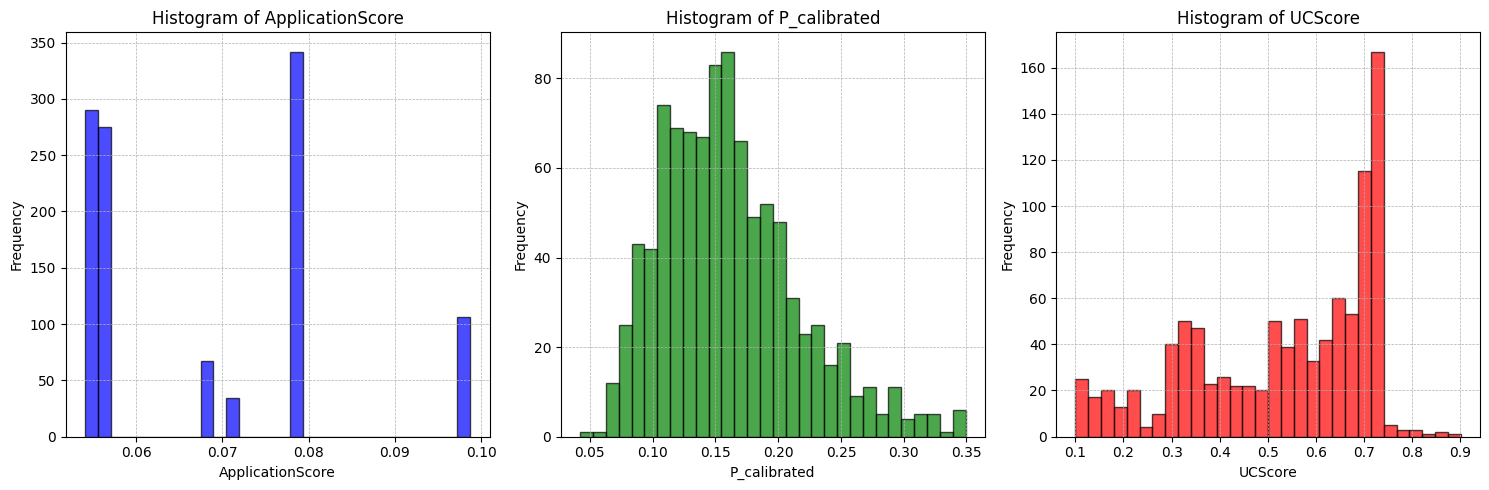

In [462]:
import matplotlib.pyplot as plt
import numpy as np

def plotFeatureHist(df, feature1, feature2, feature3):
    # Create a figure and axis
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    # Plot histograms for feature1
    axs[0].hist(df[feature1], bins=30, edgecolor='k', alpha=0.7, color='blue', density=False)
    axs[0].set_title(f'Histogram of {feature1}')
    axs[0].set_xlabel(f'{feature1}')
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for feature2
    axs[1].hist(df[feature2], bins=30, edgecolor='k', alpha=0.7, color='green', density=False)
    axs[1].set_title(f'Histogram of {feature2}')
    axs[1].set_xlabel(f'{feature2}')
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for feature3
    axs[2].hist(df[feature3], bins=30, edgecolor='k', alpha=0.7, color='red', density=False)
    axs[2].set_title(f'Histogram of {feature3}')
    axs[2].set_xlabel(f'{feature3}')
    axs[2].set_ylabel('Frequency')
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame 'df' with these features)
plotFeatureHist(pd_, 'ApplicationScore', 'P_calibrated', 'UCScore')


In [463]:
pd_['ReceivedDate'] =  pd.to_datetime(pd_['ReceivedDate'])

In [464]:
see = pd_[(pd_.ReceivedDate >= '2023-11-01')  & (pd_.ReceivedDate < '2023-12-07')]

In [465]:
n3 = see[see['reasoncodes'].str.contains('|'.join(['RK3', 'RC3']), na=False)]  # ,'27A','I25'
n3

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,SalesChannel,reasoncodes,sysdecgrpstd,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
29305,9C6BF17C34437A5606786AD30382AD525515F6F66FF871...,0.733,105.10,200000.0,PARTNER,383,2023-12-05,7984834,1,1.7054,0.056958,0.0,0.0,0.0,24.0,1989-12-16,0,WEB,"{1AA,1UA,1KA,MSO,E1S,RK3}",AP,0.0,34,1.432744,0.807329,-1.283391,0.216974,5.0,2023-12
30088,2EB323CB23C99E84BFFBCC6362C7EB8E8A844E9469E73C...,0.708,NaN,200000.0,SINGLE,310,2023-11-08,7986664,1,1.1142,0.078812,0.0,1094341.0,0.0,17.0,1994-02-12,0,WEB,"{INK,MSO,ONI,RK3}",AP,1094341.0,29,1.020707,0.735110,-1.556464,0.174155,5.0,2023-11
30089,2EB323CB23C99E84BFFBCC6362C7EB8E8A844E9469E73C...,0.655,NaN,200000.0,SINGLE,310,2023-11-08,7986664,1,1.2889,0.078812,0.0,1094341.0,0.0,16.0,1994-02-12,0,WEB,"{INK,MSO,ONI,RK3}",AP,1094341.0,29,0.878787,0.706571,-1.664377,0.159175,5.0,2023-11
43666,2E1A64B912FA7D844432B49217C175C309E334C46AD458...,0.717,NaN,30000.0,SINGLE,180,2023-11-01,8872126,1,NaN,0.078812,0.0,0.0,0.0,5.0,1996-09-28,0,WEB,"{TRM,INK,MSO,RK3}",AP,0.0,27,0.907346,0.712457,-1.642121,0.162177,5.0,2023-11
43986,A97C21861D640E3519B6447487F8FAE322BC28EF8C1438...,0.713,NaN,150000.0,SINGLE,295,2023-11-01,8873034,1,0.0024,0.078812,0.0,0.0,0.0,3.0,1988-06-29,0,WEB,"{1KA,MSO,RK3}",AP,0.0,35,0.656799,0.658541,-1.845988,0.136345,5.0,2023-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44971,1F1D51520DBC92F22224271D4D7BEAAD6335F19FDFA62E...,0.648,97.32,300000.0,PARTNER,401,2023-11-04,8875799,1,0.8466,0.056958,0.0,0.0,0.0,9.0,1996-10-10,0,BROKER,"{BEX,RC3,RK3}",RF,0.0,27,0.902696,0.711503,-1.645726,0.161687,5.0,2023-11
45560,D7F1D5C61C38773E29635221163D7342EDD6ACA805F30F...,0.535,101.18,280000.0,PARTNER,254,2023-11-06,8877539,0,0.6765,0.056958,0.0,0.0,0.0,31.0,1998-05-18,0,BROKER,"{INK,RC3,RK3}",RF,0.0,25,1.463532,0.812072,-1.265454,0.220036,5.0,2023-11
44225,6CC8B3E02890CCC4F3939FD2EE62FEB236674B2E56BCA2...,0.343,102.16,120000.0,SINGLE,355,2023-11-02,8873643,0,0.3818,0.054090,0.0,0.0,0.0,13.0,1992-01-20,0,BROKER,"{RC3,RK3}",RF,0.0,31,0.330145,0.581795,-2.136182,0.105630,4.0,2023-11
52794,8522FA77C100C35ACB082873379980AD62692D92CA0777...,0.654,NaN,80000.0,PARTNER,350,2023-11-24,8892975,1,NaN,0.056958,0.0,0.0,0.0,8.0,1994-04-20,0,BROKER,"{BEX,RC3,RK3}",RF,0.0,29,0.837331,0.697903,-1.697152,0.154838,5.0,2023-11


In [466]:
tjugosjuuu = see[see['reasoncodes'].str.contains('|'.join(['27A','I25']), na=False)]  # 
tjugosjuuu = tjugosjuuu[tjugosjuuu.Applicationtype  == 0]

tjugosjuuu

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,SalesChannel,reasoncodes,sysdecgrpstd,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
47763,E06D9352E214572DF3ABF947E32960A7F8E6BBC56689F2...,0.343,96.15,40000.0,SINGLE,309,2023-11-13,8884344,0,1.4424,0.054090,0.0,0.0,0.0,36.0,1997-05-11,0,WEB,"{BEX,BWS,1AA,1UA,MSO,E1S,27S,I25,RK3}",AP,0.0,26,1.220526,0.772156,-1.416385,0.195229,5.0,2023-11
48289,62CF0CA6B72B07F78C3113A5536BD3486C428FD61A30EA...,0.599,100.05,200000.0,SINGLE,436,2023-11-15,8885757,1,0.6280,0.078812,0.0,0.0,0.0,41.0,1992-05-14,0,WEB,"{MSO,I25,RK3}",AP,0.0,31,1.802757,0.858484,-1.089961,0.251626,5.0,2023-11
48367,EFE93BCFEE11956B1F73681DF683E690E9EA6FF0AAA266...,0.717,NaN,30000.0,SINGLE,155,2023-11-15,8885981,1,0.0103,0.098740,0.0,0.0,0.0,43.0,2000-08-05,0,WEB,"{INK,MSO,27S,I25,RK3}",AP,0.0,23,2.285494,0.907669,-0.903985,0.288232,5.0,2023-11
48669,None,NaN,NaN,200000.0,PARTNER,None,2023-11-16,8886764,0,NaN,0.071791,0.0,0.0,0.0,NaN,2002-07-25,0,WEB,"{MSO,27S,I25}",AP,0.0,21,NaN,NaN,NaN,NaN,NaN,2023-11
49165,06C39AF52C226BA8CE07B0B122025140BD87CD917C2A8B...,0.392,97.83,100000.0,SINGLE,504,2023-11-17,8887953,0,0.5177,0.054090,0.0,0.0,0.0,76.0,1989-02-09,0,WEB,"{MSO,I25,RK3}",AP,0.0,34,2.504733,0.924473,-0.840444,0.301441,5.0,2023-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51667,None,NaN,NaN,500000.0,SINGLE,None,2023-11-15,8885734,0,NaN,0.078812,0.0,0.0,0.0,NaN,1985-08-06,0,BROKER,"{1AA,1UA,I25}",RF,0.0,38,NaN,NaN,NaN,NaN,NaN,2023-11
56600,77CD473B01A90A2F6ED7737DAC7D921F9E6F7EC115DF6E...,0.576,101.65,220000.0,SINGLE,222,2023-12-04,8901517,0,0.3353,0.078812,0.0,0.0,0.0,39.0,1993-08-20,0,BROKER,"{INK,I25,RC3,RK3}",RF,0.0,30,1.709776,0.846807,-1.134114,0.243403,5.0,2023-12
52307,7FF9AB7C52AFCCDE193100A0BCF9D9482F3E2A88DCBB69...,0.102,68.91,30000.0,SINGLE,317,2023-11-22,8891467,0,0.2731,0.054069,0.0,0.0,0.0,11.0,1999-10-06,0,BROKER,"{27A,RC3,RK3}",RF,0.0,24,-0.076006,0.481008,-2.517278,0.074656,3.0,2023-11
51854,F7E643B287DB1FC2BD05D35CD76B7539F780046457EC12...,0.713,102.02,150000.0,MARRIED,122,2023-11-15,8886234,0,1.3700,0.056958,0.0,0.0,0.0,39.0,1992-01-14,0,BROKER,"{INK,I25,RC3,RK3}",RF,0.0,31,1.967004,0.877289,-1.018856,0.265250,5.0,2023-11


In [467]:
tjugosjuuu[tjugosjuuu.UCScore.isnull()]

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,SalesChannel,reasoncodes,sysdecgrpstd,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
48669,None,NaN,NaN,200000.0,PARTNER,None,2023-11-16,8886764,0,NaN,0.071791,0.0,0.0,0.0,NaN,2002-07-25,0,WEB,"{MSO,27S,I25}",AP,0.0,21,NaN,NaN,NaN,NaN,NaN,2023-11
50131,None,NaN,NaN,200000.0,MARRIED,None,2023-11-21,8890520,0,NaN,0.056958,0.0,0.0,0.0,NaN,1995-01-18,0,WEB,"{BEX,BLS,BWS,1AA,1UA,1KA,MSO,E1S,I25,RK3}",AP,0.0,28,NaN,NaN,NaN,NaN,NaN,2023-11
50267,None,NaN,NaN,70000.0,SINGLE,None,2023-11-21,8890887,0,NaN,0.098740,0.0,0.0,0.0,NaN,2000-05-05,0,WEB,"{MSO,27A,RK3}",AP,0.0,23,NaN,NaN,NaN,NaN,NaN,2023-11
50302,None,NaN,NaN,200000.0,MARRIED,None,2023-11-15,8886705,0,NaN,0.056958,0.0,0.0,0.0,NaN,1998-07-16,0,WEB,"{INK,1KA,MSO,27A}",AP,0.0,25,NaN,NaN,NaN,NaN,NaN,2023-11
50799,None,NaN,NaN,150000.0,SINGLE,None,2023-11-16,8887613,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-03-13,0,WEB,"{MSO,27S,I25,RK3}",AP,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-11
51041,None,NaN,NaN,200000.0,PARTNER,None,2023-11-23,8892728,0,NaN,0.056958,0.0,0.0,0.0,NaN,1992-04-21,0,WEB,"{1AA,1UA,1KA,MSO,E1S,I25}",AP,0.0,31,NaN,NaN,NaN,NaN,NaN,2023-11
51319,None,NaN,NaN,100000.0,PARTNER,None,2023-11-24,8893276,0,NaN,0.056958,0.0,0.0,0.0,NaN,1996-05-27,0,WEB,"{MSO,I25}",AP,0.0,27,NaN,NaN,NaN,NaN,NaN,2023-11
52524,None,NaN,NaN,100000.0,SINGLE,None,2023-11-23,8892382,0,NaN,0.098740,0.0,0.0,0.0,NaN,2003-08-29,0,WEB,"{INK,MSO,27A}",AP,0.0,20,NaN,NaN,NaN,NaN,NaN,2023-11
52807,None,NaN,NaN,100000.0,SINGLE,None,2023-11-24,8892996,0,NaN,0.098740,0.0,0.0,0.0,NaN,2002-10-01,0,WEB,"{INK,MSO,27A}",AP,0.0,21,NaN,NaN,NaN,NaN,NaN,2023-11
53113,None,NaN,NaN,30000.0,SINGLE,None,2023-11-25,8893548,0,NaN,0.098740,0.0,0.0,0.0,NaN,1999-08-23,0,WEB,"{MSO,27A,RK3}",AP,0.0,24,NaN,NaN,NaN,NaN,NaN,2023-11


# Sammanställ

In [468]:
#tillsammans = pd.concat((n3)).drop_duplicates()  # ,tjugosjuuu

tillsammans = n3

In [469]:
tillsammans

# broker 10 %

# web 5 % 


,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,SalesChannel,reasoncodes,sysdecgrpstd,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
29305,9C6BF17C34437A5606786AD30382AD525515F6F66FF871...,0.733,105.10,200000.0,PARTNER,383,2023-12-05,7984834,1,1.7054,0.056958,0.0,0.0,0.0,24.0,1989-12-16,0,WEB,"{1AA,1UA,1KA,MSO,E1S,RK3}",AP,0.0,34,1.432744,0.807329,-1.283391,0.216974,5.0,2023-12
30088,2EB323CB23C99E84BFFBCC6362C7EB8E8A844E9469E73C...,0.708,NaN,200000.0,SINGLE,310,2023-11-08,7986664,1,1.1142,0.078812,0.0,1094341.0,0.0,17.0,1994-02-12,0,WEB,"{INK,MSO,ONI,RK3}",AP,1094341.0,29,1.020707,0.735110,-1.556464,0.174155,5.0,2023-11
30089,2EB323CB23C99E84BFFBCC6362C7EB8E8A844E9469E73C...,0.655,NaN,200000.0,SINGLE,310,2023-11-08,7986664,1,1.2889,0.078812,0.0,1094341.0,0.0,16.0,1994-02-12,0,WEB,"{INK,MSO,ONI,RK3}",AP,1094341.0,29,0.878787,0.706571,-1.664377,0.159175,5.0,2023-11
43666,2E1A64B912FA7D844432B49217C175C309E334C46AD458...,0.717,NaN,30000.0,SINGLE,180,2023-11-01,8872126,1,NaN,0.078812,0.0,0.0,0.0,5.0,1996-09-28,0,WEB,"{TRM,INK,MSO,RK3}",AP,0.0,27,0.907346,0.712457,-1.642121,0.162177,5.0,2023-11
43986,A97C21861D640E3519B6447487F8FAE322BC28EF8C1438...,0.713,NaN,150000.0,SINGLE,295,2023-11-01,8873034,1,0.0024,0.078812,0.0,0.0,0.0,3.0,1988-06-29,0,WEB,"{1KA,MSO,RK3}",AP,0.0,35,0.656799,0.658541,-1.845988,0.136345,5.0,2023-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44971,1F1D51520DBC92F22224271D4D7BEAAD6335F19FDFA62E...,0.648,97.32,300000.0,PARTNER,401,2023-11-04,8875799,1,0.8466,0.056958,0.0,0.0,0.0,9.0,1996-10-10,0,BROKER,"{BEX,RC3,RK3}",RF,0.0,27,0.902696,0.711503,-1.645726,0.161687,5.0,2023-11
45560,D7F1D5C61C38773E29635221163D7342EDD6ACA805F30F...,0.535,101.18,280000.0,PARTNER,254,2023-11-06,8877539,0,0.6765,0.056958,0.0,0.0,0.0,31.0,1998-05-18,0,BROKER,"{INK,RC3,RK3}",RF,0.0,25,1.463532,0.812072,-1.265454,0.220036,5.0,2023-11
44225,6CC8B3E02890CCC4F3939FD2EE62FEB236674B2E56BCA2...,0.343,102.16,120000.0,SINGLE,355,2023-11-02,8873643,0,0.3818,0.054090,0.0,0.0,0.0,13.0,1992-01-20,0,BROKER,"{RC3,RK3}",RF,0.0,31,0.330145,0.581795,-2.136182,0.105630,4.0,2023-11
52794,8522FA77C100C35ACB082873379980AD62692D92CA0777...,0.654,NaN,80000.0,PARTNER,350,2023-11-24,8892975,1,NaN,0.056958,0.0,0.0,0.0,8.0,1994-04-20,0,BROKER,"{BEX,RC3,RK3}",RF,0.0,29,0.837331,0.697903,-1.697152,0.154838,5.0,2023-11


In [470]:
tillsammans.groupby('Probability_Bins')['Amount'].count().reset_index()

,Probability_Bins,Amount
0,1.0,1
1,2.0,3
2,3.0,60
3,4.0,202
4,5.0,487


# ON BOOK

In [471]:
tWeb = tillsammans[tillsammans.SalesChannel == 'WEB'].sample(frac=0.05)
tBroker = tillsammans[tillsammans.SalesChannel == 'BROKER'].sample(frac=0.1)

In [472]:
tillsammans = pd.concat((tWeb,tBroker))

In [473]:
## ON BOOK



In [474]:
tillsammans.groupby('Probability_Bins')['Amount'].count().reset_index()

,Probability_Bins,Amount
0,3.0,1
1,4.0,15
2,5.0,25


In [475]:
tillsammans.groupby('Probability_Bins')['Amount'].sum().reset_index()

,Probability_Bins,Amount
0,3.0,40000.0
1,4.0,1830000.0
2,5.0,3480000.0


In [476]:
tillsammans.groupby('Probability_Bins')['P_calibrated'].mean().reset_index()

,Probability_Bins,P_calibrated
0,3.0,0.091987
1,4.0,0.115827
2,5.0,0.178655


In [400]:
tillsammans.groupby('Probability_Bins')['ApplicationScore'].mean().reset_index()

,Probability_Bins,ApplicationScore
0,2.0,0.013865
1,3.0,0.054083
2,4.0,0.051134
3,5.0,0.058633


In [245]:
# Assuming df is a derived DataFrame
df = df.copy()

# Starting with a base score for all rows
df.loc[:, 'score'] = -4.2059

# Adjust score based on UCScore
df.loc[df['UCScore'] < 10, 'score'] += 0
df.loc[(df['UCScore'] >= 10) & (df['UCScore'] < 30), 'score'] += 0.9958
df.loc[(df['UCScore'] >= 30) & (df['UCScore'] < 50), 'score'] += 1.2435
df.loc[df['UCScore'] >= 50, 'score'] += 1.6464

# Adjust score based on MaritalStatus
df.loc[~df['MaritalStatus'].isin(['PARTNER','MARRIED']), 'score'] += 0.3482

# Adjust score based on Age
df.loc[df['age'] < 25, 'score'] += 0
df.loc[(df['age'] >= 25) & (df['age'] < 39), 'score'] += -0.2473
df.loc[df['age'] >= 39, 'score'] += -0.7944

df['old_model'] = (np.exp(df['score']) / (1 + np.exp(df['score']))) * 100  #) /10


In [246]:
pd_[pd_.Probability_Bins == 2 ]

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,reasoncodes,sysdecgrpstd,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
45571,C2CBAF28F0B69F32814A585012C317A934A0025A2F7D1C...,0.118,100.00,200000.0,SINGLE,297,2023-11-06,8877647,0,0.7415,0.054069,0.0,0.0,0.0,7.0,1999-03-04,0,"{1KA,MSO,RK3}",AP,0.0,24,-0.179304,0.455294,-2.614508,0.068211,2.0,2023-11
60346,597C9F8821D833FB27FAA8E88958C6A3EA5616BAD9C0CB...,0.177,NaN,30000.0,SINGLE,107,2023-12-11,8908091,1,NaN,0.054069,0.0,0.0,0.0,2.0,2000-01-24,0,"{INK,MSO,27A,RK3}",AP,0.0,23,-0.207187,0.448388,-2.640620,0.066569,2.0,2023-12
53167,B3AFCAB8609603113E9C270E3FA85AC09F9C46F5451026...,0.112,98.03,300000.0,SINGLE,219,2023-11-25,8893656,0,0.8767,0.054069,0.0,0.0,0.0,5.0,1999-09-10,0,"{INK,27A,RC3,RK3}",RF,0.0,24,-0.259468,0.435494,-2.689373,0.063603,2.0,2023-11
63538,300B2D22484FFD2FB690D0407400927782E2C5AFCDEB0B...,0.396,100.00,400000.0,SINGLE,464,2023-11-08,8880553,0,0.8043,0.054090,0.0,1679040.0,0.0,7.0,1986-07-28,0,"{RC3,RK3}",RF,1679040.0,37,-0.253078,0.437066,-2.683430,0.063958,2.0,2023-11


In [247]:
pd_[pd_.AccountNumber ==  '8718169']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,reasoncodes,sysdecgrpstd,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth


In [248]:
pd_.Applicationtype.value_counts()

Applicationtype
0    1049
2      21
1      14
Name: count, dtype: int64

In [46]:
pd_

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,0.054069,0.0,0.0,0.0,10.0,2000-09-15,0,0.0,23,0.027924,0.506981,-2.419069,0.081730,3.0,2023-08
10,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,0.078812,0.0,0.0,0.0,2.0,1991-11-19,0,0.0,31,0.398433,0.598311,-2.073730,0.111677,4.0,2023-08
31,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,0.0,21.0,1999-04-15,0,0.0,24,1.261718,0.779322,-1.389290,0.199521,5.0,2023-08
68,25660A5A420525A0250D29960E17FAEAEBE2A71E6095EE...,0.439,NaN,30000.0,SINGLE,245,2023-08-01,8770530,1,NaN,0.054090,0.0,0.0,0.0,2.0,1994-02-01,0,0.0,29,0.195600,0.548745,-2.261150,0.094392,4.0,2023-08
170,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,0.0,5.0,1998-03-21,0,0.0,25,0.963181,0.723758,-1.599388,0.168067,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,528C8EEB7A7C18319028F3DF4429E71D8271956B3E3780...,0.349,99.09,135000.0,SINGLE,372,2023-08-28,8800630,0,0.8303,0.054090,0.0,0.0,0.0,14.0,1997-03-16,0,0.0,26,0.485372,0.619016,-1.995441,0.119682,4.0,2023-08
24624,None,NaN,NaN,45000.0,SINGLE,None,2023-08-14,8785128,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-08-22,0,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-08
26685,51EA932D24C88E6BD2C185E7E0EC58173C54548A858FC2...,0.734,99.65,65000.0,SINGLE,410,2023-10-13,8853479,0,0.5264,0.078812,0.0,0.0,0.0,15.0,1997-08-03,0,0.0,26,1.303494,0.786422,-1.362442,0.203844,5.0,2023-10
47664,4C4DED4233C277EA2B760C75CEECE98F2BD2875C146AA2...,0.109,100.00,150000.0,SINGLE,285,2023-10-31,8870692,0,0.6426,0.054069,0.0,0.0,0.0,10.0,2002-11-19,0,0.0,20,-0.008492,0.497877,-2.453491,0.079184,3.0,2023-10


In [47]:
print(min(pd_.ReceivedDate))
print(max(pd_.ReceivedDate))

2022-08-16 00:00:00
2023-11-15 00:00:00


In [48]:

def getstats(df):    
    stats = {}
    
    stats["SumAmount < 220000"] = np.sum(df[df.Amount < 220000].Amount)
    #stats["StartupFeeSum < 220000"] = sum(df[df.Amount < 220000].StartupFee)
    
    stats["Count < 220000"] = len(df[df.Amount < 220000].Amount)
    
    #stats["StartupFeeSum > 220000"] = sum(df[df.Amount > 220000].StartupFee)

    stats["SumAmount > 220000"] = np.sum(df[df.Amount > 220000].Amount)
    stats["Count > 220000"] = len(df[df.Amount > 220000].Amount)

    # Calculate proportion of "Ever90" values that are 1 for Amount < 220000
    #stats["Ever90 proportion < 220000"] = len(df[(df.Ever90 == 1) & (df.Amount < 220000)]) / len(df[df.Amount < 220000])

    # Calculate proportion of "Ever90" values that are 1 for Amount > 220000
    #stats["Ever90 proportion > 220000"] = len(df[(df.Ever90 == 1) & (df.Amount > 220000)]) / len(df[df.Amount > 220000])

    return pd.Series(stats)



df = pd.DataFrame(pd_)
df['Applicationtype']   = np.where(df['Applicationtype'] == 0 , 0 ,1)


# Groupby and apply
result = df.groupby(['Probability_Bins', 'Applicationtype']).apply(getstats)

# Rename Applicationtype for clarity
#result.index.set_levels(['Main' if i == 0 else 'Co' for i in result.index.get_level_values(1)], level=1, inplace=True) 


result


SumAmount < 220000  Count < 220000  \
Probability_Bins Applicationtype                                       
1.0              1                          340000.0             5.0   
2.0              0                         1040000.0             9.0   
                 1                          631000.0             7.0   
3.0              0                        15457000.0           152.0   
                 1                         2856000.0            23.0   
4.0              0                        54517895.0           499.0   
                 1                         4713000.0            44.0   
5.0              0                       139839700.0          1299.0   
                 1                         5902000.0            64.0   

                                  SumAmount > 220000  Count > 220000  
Probability_Bins Applicationtype                                      
1.0              1                          300000.0             1.0  
2.0              0                         1960000.0             5.0  
                 1                         1100000.0             3.0  
3.0              0                        10385000.0            31.0  
                 1                         3131000.0            10.0  
4.0              0                        24458324.0            72.0  
                 1                         9291000.0            27.0  
5.0              0                        40082000.0           116.0  
                 1                        17199000.0            50.0

In [49]:
file_name = "Distribution.xlsx"
result.to_excel(file_name, engine='openpyxl', index=False)

In [50]:
df[df.ReceivedDate >='2023-08-01']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,0.054069,0.0,0.0,0.0,10.0,2000-09-15,0,0.0,23,0.027924,0.506981,-2.419069,0.081730,3.0,2023-08
10,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,0.078812,0.0,0.0,0.0,2.0,1991-11-19,0,0.0,31,0.398433,0.598311,-2.073730,0.111677,4.0,2023-08
31,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,0.0,21.0,1999-04-15,0,0.0,24,1.261718,0.779322,-1.389290,0.199521,5.0,2023-08
68,25660A5A420525A0250D29960E17FAEAEBE2A71E6095EE...,0.439,NaN,30000.0,SINGLE,245,2023-08-01,8770530,1,NaN,0.054090,0.0,0.0,0.0,2.0,1994-02-01,0,0.0,29,0.195600,0.548745,-2.261150,0.094392,4.0,2023-08
170,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,0.0,5.0,1998-03-21,0,0.0,25,0.963181,0.723758,-1.599388,0.168067,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,528C8EEB7A7C18319028F3DF4429E71D8271956B3E3780...,0.349,99.09,135000.0,SINGLE,372,2023-08-28,8800630,0,0.8303,0.054090,0.0,0.0,0.0,14.0,1997-03-16,0,0.0,26,0.485372,0.619016,-1.995441,0.119682,4.0,2023-08
24624,None,NaN,NaN,45000.0,SINGLE,None,2023-08-14,8785128,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-08-22,0,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-08
26685,51EA932D24C88E6BD2C185E7E0EC58173C54548A858FC2...,0.734,99.65,65000.0,SINGLE,410,2023-10-13,8853479,0,0.5264,0.078812,0.0,0.0,0.0,15.0,1997-08-03,0,0.0,26,1.303494,0.786422,-1.362442,0.203844,5.0,2023-10
47664,4C4DED4233C277EA2B760C75CEECE98F2BD2875C146AA2...,0.109,100.00,150000.0,SINGLE,285,2023-10-31,8870692,0,0.6426,0.054069,0.0,0.0,0.0,10.0,2002-11-19,0,0.0,20,-0.008492,0.497877,-2.453491,0.079184,3.0,2023-10


In [51]:

df


result = df.groupby('Probability_Bins')['Amount'].count().reset_index()

result['Count'] = result['Amount']

In [52]:
amount = df.groupby('Probability_Bins')['Amount'].sum().reset_index()
result['Amount'] = amount.Amount
result

,Probability_Bins,Amount,Count
0,1.0,640000.0,6
1,2.0,4731000.0,24
2,3.0,32269000.0,218
3,4.0,93640219.0,645
4,5.0,203462700.0,1531


In [53]:
file_name = "Distribution.xlsx"
result.to_excel(file_name, engine='openpyxl', index=False)


In [54]:
RF.BrokerName

15       None
43       None
123      None
168      None
185      None
         ... 
14625    None
14627    None
14647    None
14649    None
14710    None
Name: BrokerName, Length: 1331, dtype: object

In [55]:
RF[RF.U_applicationid == '8787680'].BrokerName

Series([], Name: BrokerName, dtype: object)

In [56]:

AP[AP['reasoncodes'].str.contains('INK', na=False)]


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
145,8771138,2023-08-01 13:28:37.897,"{INK,1AA,1UA,1KA,MSO,E1S}",AP,ACC,"{""Sökandes uppgivna inkomst mer än 120 % av UC...",INK,Sökandes uppgivna inkomst mer än 120 % av UC i...,1AA,Ensamsökande Nystart skuldkvot över 100 %.,1UA,Ensamsökande UC skuldkvot över 100 %.,1KA,Ensamsökande KALP under 5 000 kronor.,MSO,"Medsökandekrav, ej låneförmedlare.",7,8,152,-3235,200000,96,22.65,E,1995,4.92,PDscore_Newcustomer01,1.0,8771138,8771138,E01F5935F58584716FCD05E996014EDBF1E0F12F45BB0A...,1,0,7.179085,2023-08-01,None,200000.0,0,Michael,WEB,Nystartlånet,0,None,WEB,1999-09-20,,PARTNER,FULL,OWNED,32000.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,NaN,NaN,NaN,NaN,None,NaN,NaN,0.0,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

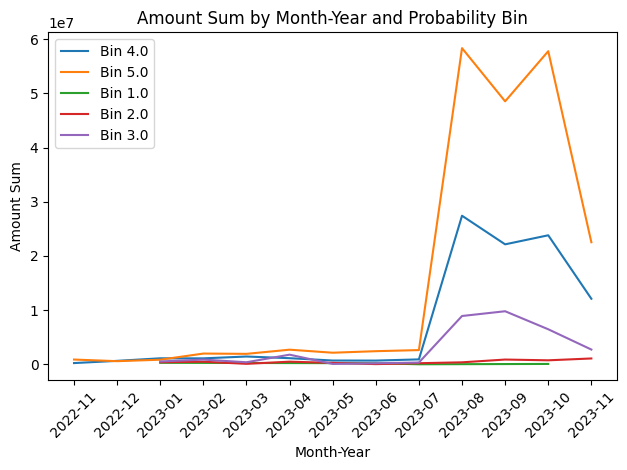

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data setup
# df = pd.DataFrame(pd_)

# Extract year and month from 'ReceivedDate'
df['YearMonth'] = df['ReceivedDate'].dt.to_period('M')

# Group by 'YearMonth' and 'Probability_Bins', then sum 'Amount'
result = df.groupby(['YearMonth', 'Probability_Bins'])['Amount'].sum().reset_index()

# Plotting
for bin in result['Probability_Bins'].unique():
    subset = result[result['Probability_Bins'] == bin]
    plt.plot(subset['YearMonth'].astype(str), subset['Amount'], label=f"Bin {bin}")

plt.title("Amount Sum by Month-Year and Probability Bin")
plt.xlabel("Month-Year")
plt.ylabel("Amount Sum")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust plot layout for better visibility
plt.show()


In [58]:
pd_

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,0.054069,0.0,0.0,0.0,10.0,2000-09-15,0,0.0,23,0.027924,0.506981,-2.419069,0.081730,3.0,2023-08
10,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,0.078812,0.0,0.0,0.0,2.0,1991-11-19,0,0.0,31,0.398433,0.598311,-2.073730,0.111677,4.0,2023-08
31,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,0.0,21.0,1999-04-15,0,0.0,24,1.261718,0.779322,-1.389290,0.199521,5.0,2023-08
68,25660A5A420525A0250D29960E17FAEAEBE2A71E6095EE...,0.439,NaN,30000.0,SINGLE,245,2023-08-01,8770530,1,NaN,0.054090,0.0,0.0,0.0,2.0,1994-02-01,0,0.0,29,0.195600,0.548745,-2.261150,0.094392,4.0,2023-08
170,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,0.0,5.0,1998-03-21,0,0.0,25,0.963181,0.723758,-1.599388,0.168067,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,528C8EEB7A7C18319028F3DF4429E71D8271956B3E3780...,0.349,99.09,135000.0,SINGLE,372,2023-08-28,8800630,0,0.8303,0.054090,0.0,0.0,0.0,14.0,1997-03-16,0,0.0,26,0.485372,0.619016,-1.995441,0.119682,4.0,2023-08
24624,None,NaN,NaN,45000.0,SINGLE,None,2023-08-14,8785128,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-08-22,0,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-08
26685,51EA932D24C88E6BD2C185E7E0EC58173C54548A858FC2...,0.734,99.65,65000.0,SINGLE,410,2023-10-13,8853479,0,0.5264,0.078812,0.0,0.0,0.0,15.0,1997-08-03,0,0.0,26,1.303494,0.786422,-1.362442,0.203844,5.0,2023-10
47664,4C4DED4233C277EA2B760C75CEECE98F2BD2875C146AA2...,0.109,100.00,150000.0,SINGLE,285,2023-10-31,8870692,0,0.6426,0.054069,0.0,0.0,0.0,10.0,2002-11-19,0,0.0,20,-0.008492,0.497877,-2.453491,0.079184,3.0,2023-10
